In [5]:
import pandas as pd
df = pd.read_csv('C:\\Users\\akasa\\Downloads\\DSA_features.csv')
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.layers import Dropout

In [7]:
df.isnull().value_counts()

T_xacc_mean  T_xacc_max  T_xacc_min  T_xacc_var  T_xacc_std  T_xacc_skew  T_yacc_mean  T_yacc_max  T_yacc_min  T_yacc_var  T_yacc_std  T_yacc_skew  T_zacc_mean  T_zacc_max  T_zacc_min  T_zacc_var  T_zacc_std  T_zacc_skew  T_xgyro_mean  T_xgyro_max  T_xgyro_min  T_xgyro_var  T_xgyro_std  T_xgyro_skew  T_ygyro_mean  T_ygyro_max  T_ygyro_min  T_ygyro_var  T_ygyro_std  T_ygyro_skew  T_zgyro_mean  T_zgyro_max  T_zgyro_min  T_zgyro_var  T_zgyro_std  T_zgyro_skew  T_xmag_mean  T_xmag_max  T_xmag_min  T_xmag_var  T_xmag_std  T_xmag_skew  T_ymag_mean  T_ymag_max  T_ymag_min  T_ymag_var  T_ymag_std  T_ymag_skew  T_zmag_mean  T_zmag_max  T_zmag_min  T_zmag_var  T_zmag_std  T_zmag_skew  RA_xacc_mean  RA_xacc_max  RA_xacc_min  RA_xacc_var  RA_xacc_std  RA_xacc_skew  RA_yacc_mean  RA_yacc_max  RA_yacc_min  RA_yacc_var  RA_yacc_std  RA_yacc_skew  RA_zacc_mean  RA_zacc_max  RA_zacc_min  RA_zacc_var  RA_zacc_std  RA_zacc_skew  RA_xgyro_mean  RA_xgyro_max  RA_xgyro_min  RA_xgyro_var  RA_xgyro_std  RA_xg

In [8]:
df['activity'].value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

In [9]:
df['people'] = df['people'].replace({'p1': '0','p2' : '1','p3': '2','p4' : '3','p5': '4','p6' : '5','p7': '6','p8' : '7'})

Index(['T_xacc_min', 'T_xacc_skew', 'T_yacc_skew', 'T_zacc_mean',
       'T_zacc_skew', 'T_xgyro_skew', 'T_ygyro_mean', 'T_ygyro_skew',
       'T_zgyro_mean', 'T_zgyro_skew', 'T_xmag_skew', 'T_ymag_skew',
       'T_zmag_skew', 'RA_xacc_skew', 'RA_yacc_skew', 'RA_zacc_mean',
       'RA_zacc_max', 'RA_zacc_skew', 'RA_xgyro_mean', 'RA_xgyro_skew',
       'RA_ygyro_mean', 'RA_ygyro_skew', 'RA_zgyro_mean', 'RA_zgyro_skew',
       'RA_xmag_skew', 'RA_ymag_skew', 'RA_zmag_skew', 'LA_xacc_skew',
       'LA_yacc_mean', 'LA_yacc_skew', 'LA_zacc_skew', 'LA_xgyro_mean',
       'LA_xgyro_skew', 'LA_ygyro_mean', 'LA_ygyro_skew', 'LA_zgyro_mean',
       'LA_zgyro_skew', 'LA_xmag_skew', 'LA_ymag_skew', 'LA_zmag_skew',
       'RL_yacc_skew', 'RL_zacc_mean', 'RL_zacc_skew', 'RL_xgyro_skew',
       'RL_ygyro_skew', 'RL_zgyro_mean', 'RL_zgyro_skew', 'RL_xmag_skew',
       'RL_ymag_skew', 'RL_zmag_skew', 'LL_yacc_skew', 'LL_zacc_skew',
       'LL_xgyro_skew', 'LL_ygyro_skew', 'LL_zgyro_mean', 'LL_zgyro_ske

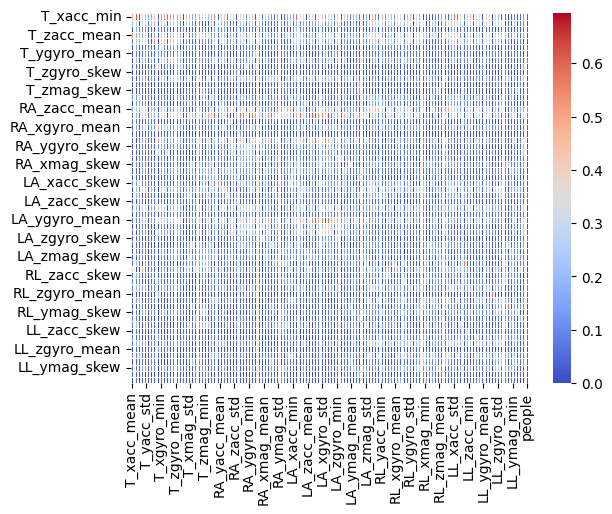

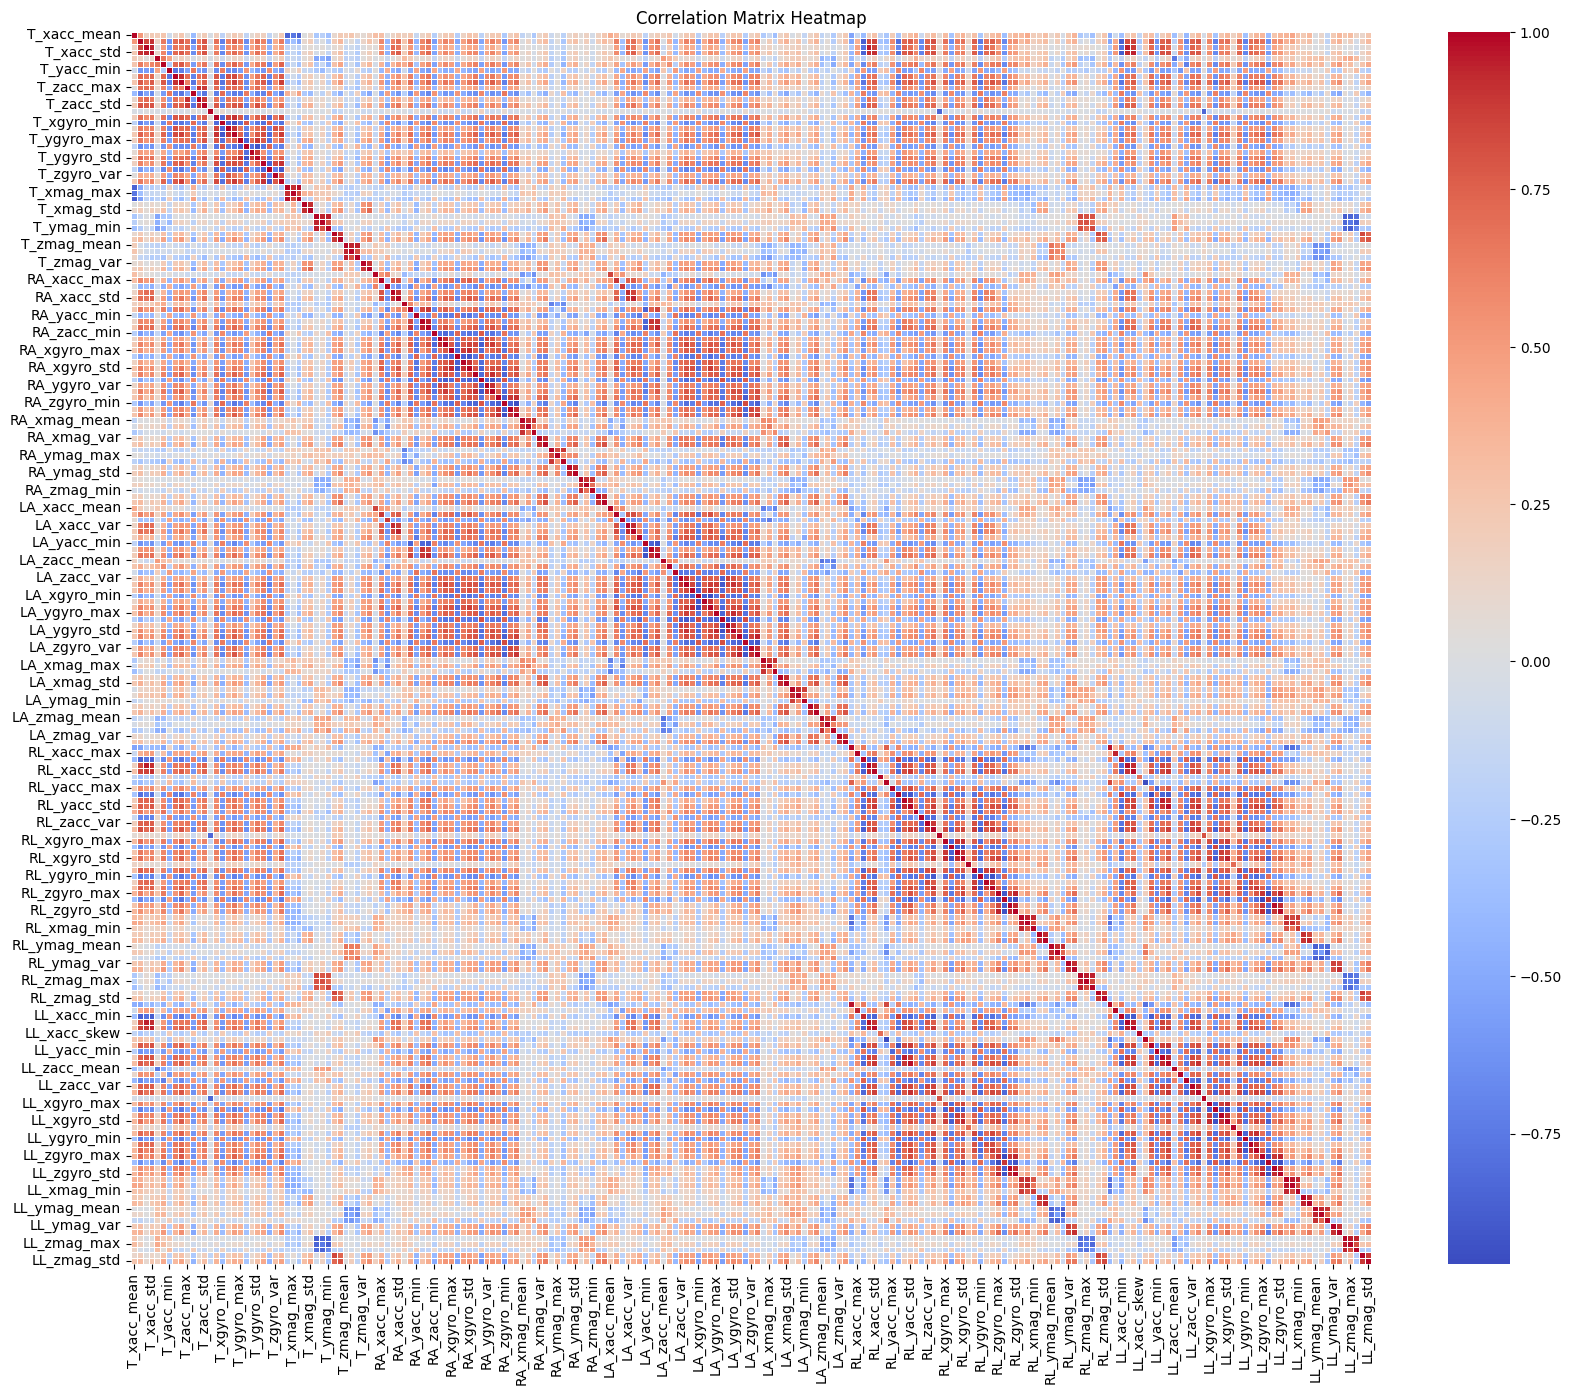

In [10]:
import seaborn as sns
# 히트맵 그리기
df_check = df.drop('activity',axis=1)
corr_matrix = df_check.corr()

abs_matrix = corr_matrix.abs()
np.fill_diagonal(abs_matrix.values, 0)

threshold = 0.7
corr_columns = abs_matrix.columns[(abs_matrix.max() < threshold)]
corr_abs = abs_matrix[(abs_matrix.max() < threshold)]
sns.heatmap(corr_abs, annot=False, cmap='coolwarm', linewidths=0.5)

df_cleaned = df_check.drop(corr_columns, axis=1)
print(corr_columns)
print(df_cleaned.columns)

corr_matrix_cleaned = df_cleaned.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix_cleaned, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [11]:
df_check['activity'] = df['activity']

In [12]:
normal = df[(df['activity'] == 'lyingRigh') | (df['activity'] == 'lyingBack')]
normal['activity'] = normal['activity'].replace({'lyingRigh': 'lying','lyingBack' : 'lying'})
abnormal = df[df['activity'] == 'sitting']
print(normal)
print(abnormal)
print(normal.shape)
print(abnormal.shape)

      T_xacc_mean  T_xacc_max  T_xacc_min  T_xacc_var  T_xacc_std  \
960     -4.834646     -4.7185     -4.9049    0.001124    0.033529   
961     -4.780810     -4.5850     -4.8833    0.003948    0.062835   
962     -4.804400     -4.7037     -4.8755    0.001482    0.038496   
963     -4.750563     -4.5696     -4.8977    0.004447    0.066683   
964     -4.774916     -4.6741     -4.8457    0.001080    0.032868   
...           ...         ...         ...         ...         ...   
1915     2.620502      2.6592      2.5891    0.000199    0.014113   
1916     2.613423      2.6572      2.5815    0.000207    0.014387   
1917     2.614750      2.6576      2.5654    0.000257    0.016018   
1918     2.620167      2.6589      2.5781    0.000216    0.014691   
1919     2.615565      2.6789      2.5734    0.000310    0.017610   

      T_xacc_skew  T_yacc_mean  T_yacc_max  T_yacc_min  T_yacc_var  ...  \
960      0.632141    -0.501018    -0.41744    -0.59561    0.001016  ...   
961      1.052880    

C:\Users\akasa\AppData\Local\Temp\ipykernel_19672\2693120935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal['activity'] = normal['activity'].replace({'lyingRigh': 'lying','lyingBack' : 'lying'})


In [13]:
normal['people'] = normal['people'].astype('float64')
abnormal['people'] =abnormal['people'].astype('float64')
normal.drop('activity',axis=1)
abnormal.drop('activity',axis=1)

C:\Users\akasa\AppData\Local\Temp\ipykernel_19672\3802891540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal['people'] = normal['people'].astype('float64')
C:\Users\akasa\AppData\Local\Temp\ipykernel_19672\3802891540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abnormal['people'] =abnormal['people'].astype('float64')


,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.18320,0.99744,0.002208,...,6.267229e-07,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,0.0
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.21290,1.05810,0.000784,...,7.403458e-07,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,0.0
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.21280,1.07960,0.000508,...,5.802523e-07,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,0.0
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.31700,1.07870,0.002173,...,5.398837e-07,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,0.0
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.25740,1.09450,0.000662,...,6.787533e-07,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,7.734838,7.7883,7.6763,0.000608,0.024660,-0.022146,-0.416356,-0.35260,-0.50937,0.001245,...,1.072772e-04,0.010357,0.289383,0.329865,0.363190,0.306120,9.055769e-05,0.009516,0.403417,7.0
476,7.738216,7.7824,7.6831,0.000610,0.024693,-0.004124,-0.426881,-0.34348,-0.49827,0.001128,...,6.787377e-05,0.008239,-0.261908,0.316558,0.335720,0.287330,6.043384e-05,0.007774,-0.850370,7.0
477,7.723710,7.7890,7.6726,0.000432,0.020776,0.000934,-0.448897,-0.38804,-0.52647,0.000552,...,6.549967e-05,0.008093,0.483354,0.315570,0.339150,0.290260,6.368315e-05,0.007980,-0.046112,7.0
478,7.723558,7.7785,7.6808,0.000496,0.022262,0.497403,-0.434654,-0.36902,-0.50906,0.000936,...,5.386677e-05,0.007339,-1.038639,0.313773,0.342060,0.288580,6.228622e-05,0.007892,0.407187,7.0


In [14]:
normal.dtypes

T_xacc_mean     float64
T_xacc_max      float64
T_xacc_min      float64
T_xacc_var      float64
T_xacc_std      float64
                 ...   
LL_zmag_var     float64
LL_zmag_std     float64
LL_zmag_skew    float64
activity         object
people          float64
Length: 272, dtype: object

In [15]:
X = normal.drop('activity',axis=1)
y = normal['activity']
ab_X = abnormal.drop('activity',axis=1)
ab_y = abnormal['activity']

In [16]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 1262 to 1062
Columns: 271 entries, T_xacc_mean to people
dtypes: float64(271)
memory usage: 1.6 MB


In [18]:
X_train.dtypes

T_xacc_mean     float64
T_xacc_max      float64
T_xacc_min      float64
T_xacc_var      float64
T_xacc_std      float64
                 ...   
LL_zmag_min     float64
LL_zmag_var     float64
LL_zmag_std     float64
LL_zmag_skew    float64
people          float64
Length: 271, dtype: object

In [19]:
ss = StandardScaler()
ss.fit(X_train)
ss.transform(X_train)
ss.transform(X_test)

array([[-0.792093  , -0.81794771, -0.76771411, ..., -0.22447266,
        -0.46875327,  0.64630683],
       [-0.1111479 , -0.12952372, -0.10044017, ...,  1.43540168,
         1.07860115,  1.52095643],
       [-1.20658237, -1.21658314, -1.19345967, ..., -0.38538334,
         0.7911001 ,  0.64630683],
       ...,
       [-1.15529155, -1.08684864, -1.18521114, ..., -0.34710453,
        -0.31204772, -1.54031717],
       [-1.22160624, -1.21611335, -1.23048878, ..., -0.36279764,
        -0.13328902, -1.54031717],
       [ 1.05015501,  1.03743624,  1.06295965, ..., -0.37105593,
         0.31150826, -0.22834277]])

In [20]:
No_noise_train = X_train.copy()

noise_factor = 0.5

for label in X_train.columns:
  num = X_train[label].shape[0]
  X_train[label] = pd.to_numeric(X_train[label], errors='coerce')
  X_train[label] = X_train[label] + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=num)

In [21]:
No_noise_train

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,people
1262,-4.541241,-4.44020,-4.63410,0.001340,0.036602,0.017044,-0.900889,-0.82668,-1.01970,0.001715,...,5.031118e-07,0.000709,0.006901,-0.653858,-0.65199,-0.65580,5.322756e-07,0.000730,0.025929,5.0
1427,-1.668885,-1.61860,-1.71250,0.000510,0.022587,0.174769,-2.259705,-2.14930,-2.33960,0.000994,...,7.335241e-05,0.008565,0.337140,-0.637659,-0.61554,-0.66108,6.682249e-05,0.008175,-0.090984,7.0
1254,-3.821946,-3.69680,-3.93580,0.002595,0.050945,-0.383433,-0.491602,-0.42581,-0.54426,0.000504,...,4.653010e-07,0.000682,-0.260774,0.635377,0.63723,0.63401,4.532566e-07,0.000673,0.036905,4.0
1508,0.454222,0.49106,0.41591,0.000306,0.017496,-0.300751,-8.862662,-8.79640,-8.93040,0.000805,...,4.248145e-06,0.002061,-0.325501,-0.894958,-0.89257,-0.89746,7.151732e-07,0.000846,-0.093956,1.0
1425,-1.656930,-1.60300,-1.72510,0.000895,0.029912,-0.246805,-2.278474,-2.23090,-2.35270,0.000611,...,6.072402e-05,0.007793,0.862603,-0.637034,-0.61364,-0.66625,7.641000e-05,0.008741,0.049122,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,-2.077746,-1.99330,-2.17230,0.001209,0.034776,-0.313388,-0.469514,-0.38469,-0.66033,0.002111,...,4.388285e-07,0.000662,-0.394638,0.315758,0.31735,0.31360,4.394426e-07,0.000663,-0.170766,1.0
1230,-3.830510,-3.71190,-3.98720,0.005074,0.071235,-0.620722,-0.505787,-0.43961,-0.60264,0.000687,...,6.125316e-07,0.000783,0.165551,0.634941,0.63684,0.63337,5.346971e-07,0.000731,0.388538,4.0
1820,0.475771,0.54707,0.39811,0.000648,0.025451,0.296898,-8.565474,-8.49370,-8.66360,0.001218,...,6.179644e-07,0.000786,0.055165,-0.857231,-0.85580,-0.85905,5.081913e-07,0.000713,-0.314481,6.0
1395,-1.690450,-1.64210,-1.75840,0.000639,0.025276,-0.236978,-2.291043,-2.24090,-2.33680,0.000487,...,5.240129e-05,0.007239,0.393974,-0.628978,-0.59942,-0.65374,8.187129e-05,0.009048,0.375780,7.0


In [22]:
No_noise_test = X_test.copy()

noise_factor = 0.5

for label in X_test.columns:
  num = X_test[label].shape[0]
  X_test[label] = pd.to_numeric(X_test[label], errors='coerce')
  X_test[label] = X_test[label] + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=num)

In [23]:
input_dim = No_noise_train.shape[1]
encoding_dim = 14  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
encoded = Dropout(0.5)(encoded)
encoded = Dense(int(encoding_dim / 4), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 4), activation='relu')(encoded)
decoded = Dropout(0.5)(decoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.005), loss='mse')

In [24]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = autoencoder.fit(X_train, X_train,
                          epochs=500,
                          batch_size=256,
                          shuffle=True,
                          validation_data =(X_train,X_train),
                          callbacks=early_stopping)

Epoch 1/500
3/3 [==============================] - 1s 147ms/step - loss: 6.0358 - val_loss: 6.0300
Epoch 2/500
3/3 [==============================] - 0s 24ms/step - loss: 6.0122 - val_loss: 5.9691
Epoch 3/500
3/3 [==============================] - 0s 25ms/step - loss: 5.9392 - val_loss: 5.8215
Epoch 4/500
3/3 [==============================] - 0s 25ms/step - loss: 5.8454 - val_loss: 5.6772
Epoch 5/500
3/3 [==============================] - 0s 25ms/step - loss: 5.7626 - val_loss: 5.5464
Epoch 6/500
3/3 [==============================] - 0s 26ms/step - loss: 5.6885 - val_loss: 5.4539
Epoch 7/500
3/3 [==============================] - 0s 25ms/step - loss: 5.6349 - val_loss: 5.3988
Epoch 8/500
3/3 [==============================] - 0s 26ms/step - loss: 5.6174 - val_loss: 5.3729
Epoch 9/500
3/3 [==============================] - 0s 28ms/step - loss: 5.6020 - val_loss: 5.3591
Epoch 10/500
3/3 [==============================] - 0s 28ms/step - loss: 5.5493 - val_loss: 5.3489
Epoch 11/500
3/3 [

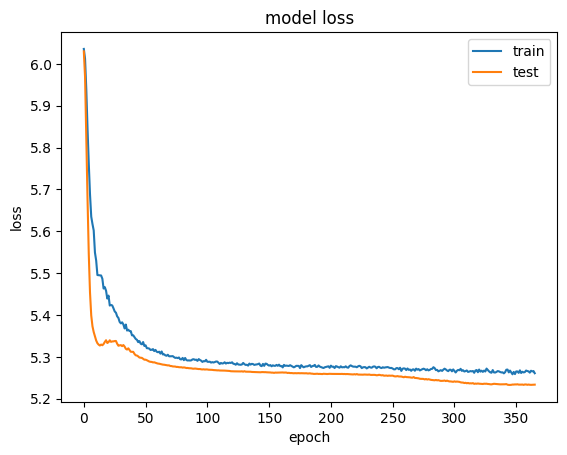

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [26]:
import numpy as np
import pandas as pd

# 1. Autoencoder로 정상 데이터 및 노이즈 데이터 예측 (재구성 값 계산)
No_noise_train_pred = autoencoder.predict(No_noise_train)
X_train_pred = autoencoder.predict(X_train)  # 노이즈 데이터

# 2. 재구성 오차 계산 (MSE 방식)
train_mse = np.mean(np.power(No_noise_train - No_noise_train_pred, 2), axis=1)
val_mse = np.mean(np.power(X_train - X_train_pred, 2), axis=1)

# 3. 정상 데이터와 이상치에 대한 true_class 값 설정 (정상: 0, 이상치: 1)
# 예시로 train 데이터는 정상(0), val 데이터는 노이즈(1)로 설정
true_class_train = np.zeros(len(train_mse))  # 정상 데이터는 0으로
true_class_val = np.ones(len(val_mse))  # 노이즈 데이터는 1으로

# 4. error_df 생성 (train과 val 데이터를 합쳐서 생성)
error_df = pd.DataFrame({
    'reconstruction_error': np.concatenate([train_mse, val_mse]),  # 재구성 오차 값
    'true_class': np.concatenate([true_class_train, true_class_val])  # 클래스(정상: 0, 이상치: 1)
})

# 결과 확인
print(error_df.head())


24/24 [==============================] - 0s 2ms/step
   reconstruction_error  true_class
0              4.757270         0.0
1              4.641880         0.0
2              4.803866         0.0
3              5.123091         0.0
4              4.641401         0.0


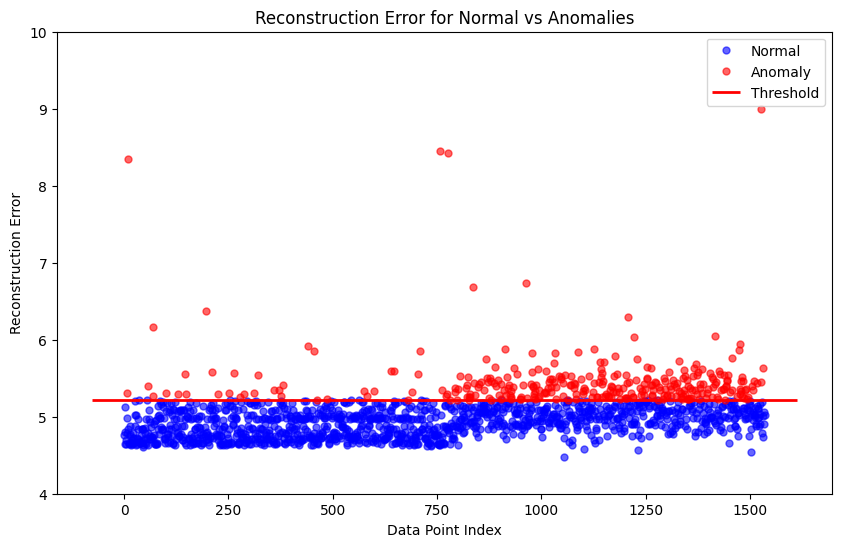

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Autoencoder로 계산된 재구성 오차가 있는 error_df를 사용한다고 가정
# 정상 데이터와 노이즈 데이터를 포함한 재구성 오차 및 true_class

# 정상 데이터의 재구성 오차 분포를 기반으로 임계값 설정 (상위 95%를 임계값으로)
threshold = np.percentile(error_df[error_df['true_class'] == 0]['reconstruction_error'], 95)

# 이상치 탐지: 재구성 오차가 임계값을 초과하는 데이터를 이상치로 간주
error_df['anomaly'] = error_df['reconstruction_error'] > threshold

# 시각화
fig, ax = plt.subplots(figsize=(10, 6))

# 정상 데이터 (anomaly = False)
normal_data = error_df[error_df['anomaly'] == False]
ax.plot(normal_data.index, normal_data.reconstruction_error, marker='o', ms=5, linestyle='', 
        label="Normal", alpha=0.6, color='blue')

# 이상치 데이터 (anomaly = True)
anomaly_data = error_df[error_df['anomaly'] == True]
ax.plot(anomaly_data.index, anomaly_data.reconstruction_error, marker='o', ms=5, linestyle='', 
        label="Anomaly", alpha=0.6, color='red')

# 임계값에 대한 수평선 그리기 (Threshold)
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold', linewidth=2)

# 범례, 제목, 축 라벨 추가
ax.legend()
plt.title("Reconstruction Error for Normal vs Anomalies")
plt.ylim(4,10)
plt.ylabel("Reconstruction Error")
plt.xlabel("Data Point Index")

# 그래프 표시
plt.show()


In [28]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

6/6 [==============================] - 0s 2ms/step


,reconstruction_error
count,192.000000
mean,5.158282
std,0.312252
min,4.640229
25%,4.957912
50%,5.110044
75%,5.299329
max,7.519501
